## Exploring iSOON's Leaked Chats

Ref: [I-SOON Leak News](https://www.darkreading.com/threat-intelligence/-isoon-contractor-helps-the-prc-hack-foreign-governments-companies)

### Setup Dependencies

In [21]:
import sys
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import rcParams
import spacy
import gensim
from gensim.parsing.preprocessing import STOPWORDS as gensim_stopwords
from gensim.parsing.preprocessing import remove_stopwords
from pprint import pprint

## Process Unstructured Text

### Read Chat File

In [2]:
INPUT_FILE_NAME = "isoon_chats_english.txt"

In [3]:

path = os.path.join(os.getcwd(),INPUT_FILE_NAME)
with open(path,"r") as fh:
        file_data = fh.read()

### Load Stopwords

In [4]:
stopwords_list = []
spacy_en_model = spacy.load('en_core_web_sm')
nltk.download("stopwords")

spacy_stopwords = list(spacy_en_model.Defaults.stop_words)
nltk_stopwords = stopwords.words("english")
gensim_stopwords = list(gensim_stopwords)

[nltk_data] Downloading package stopwords to /home/bikram-
[nltk_data]     xps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stopwords_list.extend(spacy_stopwords + nltk_stopwords + gensim_stopwords)
stopwords_list.extend([
    'td',
    'tr',
    'NULL'
])


In [6]:
# Remove stopwords from given text
file_data = remove_stopwords(file_data)

## Generate Wordcloud

In [7]:
MAX_WORDS_IN_WORDCLOUD = 500
WORDCLOUD_BACKGROUND_COLOR = "black"

In [8]:
#call the wordcloud Constructor 
WC = WordCloud(
    stopwords=stopwords_list,
    max_words=MAX_WORDS_IN_WORDCLOUD,
    background_color=WORDCLOUD_BACKGROUND_COLOR, 
    width=1800, 
    height=800, 
    collocations=False).generate(file_data)

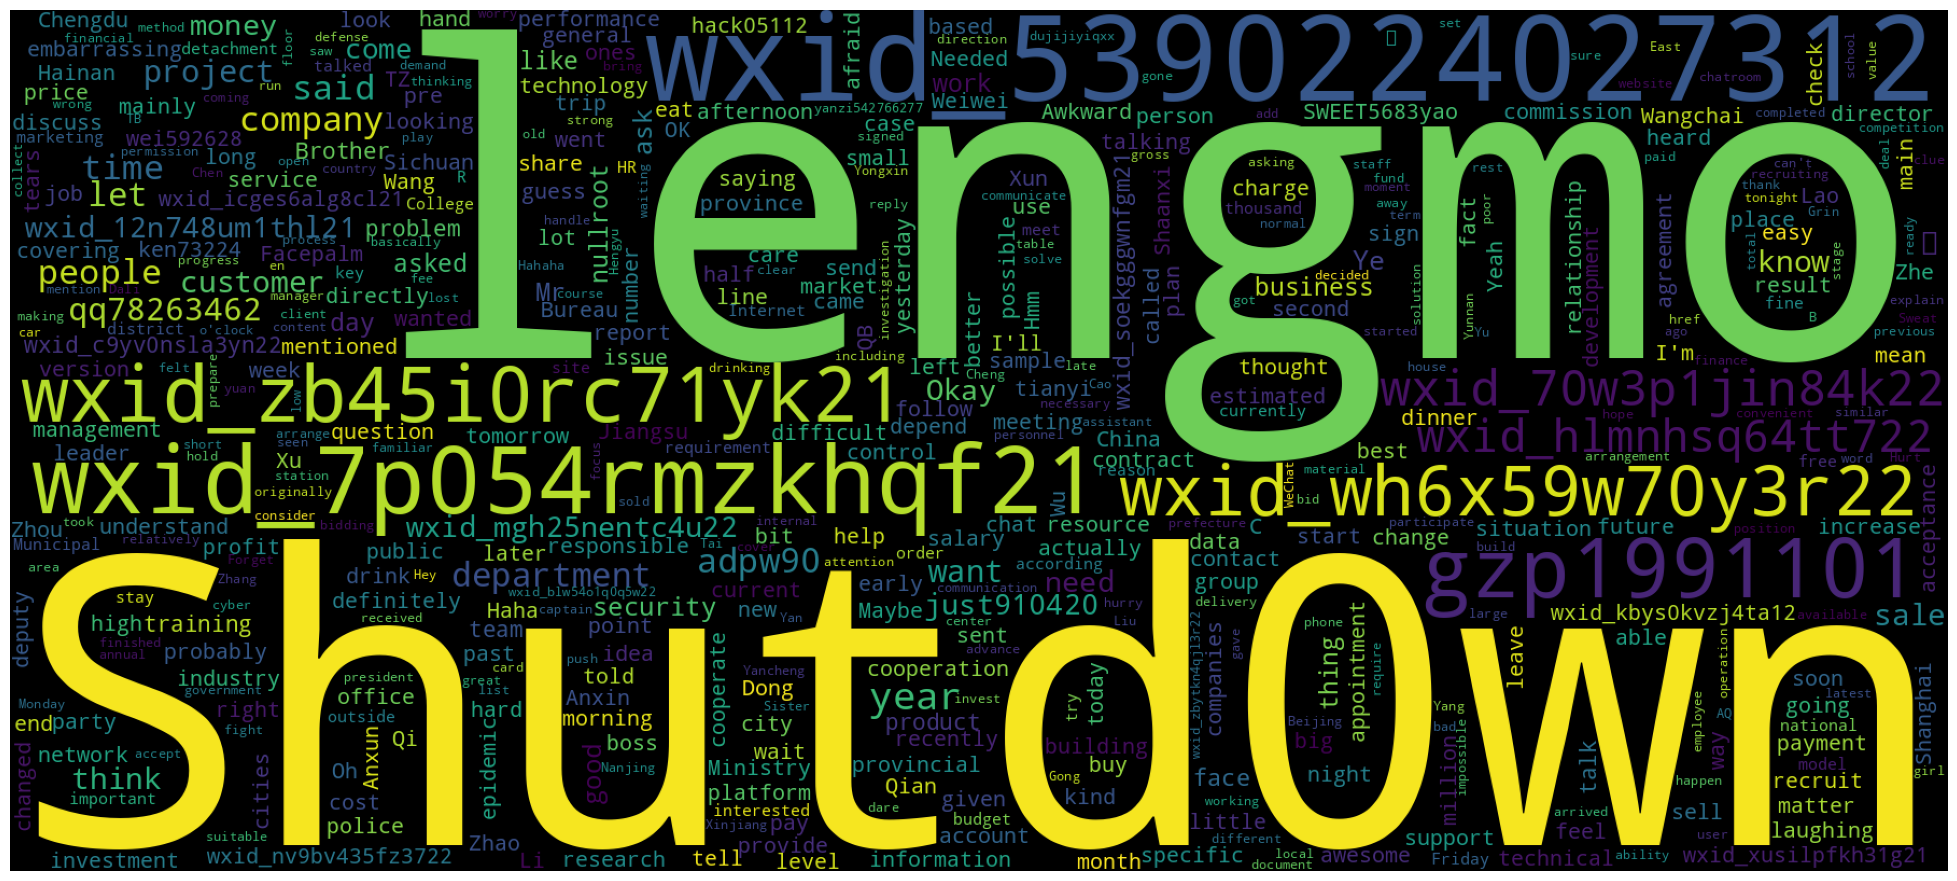

In [9]:
plt.figure(figsize=(25,15), facecolor='white')
plt.imshow(WC)
plt.axis("off")
plt.show()

## Extract Observables / Interesting Strings

In [19]:
from ioc_finder import find_iocs

EXTRACTED_STRINGS_OUTPUT_FILE = 'data_output/interesting_strings.json'
ALLOWED_IOC_TYPES = [
    # "asns",
    # "attack_mitigations",
    # "attack_tactics",
    # "attack_techniques",
    # "authentihashes",
    "bitcoin_addresses",
    # "cves",
    "domains",
    "email_addresses",
    # "email_addresses_complete",
    "file_paths",
    # "google_adsense_publisher_ids",
    # "google_analytics_tracker_ids",
    # "imphashes",
    # "ipv4_cidrs",
    "ipv4s",
    # "ipv6s",
    # "mac_addresses",
    "md5s",
    "monero_addresses",
    # "registry_key_paths",
    "sha1s",
    "sha256s",
    # "sha512s",
    # "ssdeeps",
    # "tlp_labels",
    "urls",
    "user_agents",
    "xmpp_addresses",
]

In [10]:
# observables = parse_domain_names(file_data)
observables = find_iocs(file_data, included_ioc_types=ALLOWED_IOC_TYPES)

In [13]:
# Cleanup domains - remove all .md files
observables['domains'] = [domain for domain in observables['domains'] if not domain.endswith('-en.md')]

['www.yutainews.com',
 'meeting.tencent.com',
 'translate.google.com',
 'surl.amap.com',
 'm.sohu.com',
 'm.guancha.cn',
 'www.57w66.com',
 'mahagst.gov.in',
 'zhuanlan.zhihu.com',
 'www.w81519.com',
 'www.cac.gov.cn',
 'www.cyberdefensemagazine.com',
 'mjj-rocrpy.vaiwan.com',
 'www.w66369.com',
 'www.plap.cn',
 't.wss.ink',
 'qq.com',
 'finance.sina.com.cn',
 'w66588.com',
 'selectarticlenewsbyid.do',
 'pan.baidu.com',
 'baike.baidu.com',
 'w81518.com',
 'gd9189.com',
 'drdo.gov.in']

In [20]:
import json
with open(EXTRACTED_STRINGS_OUTPUT_FILE, 'w') as wfile:
    json.dump(observables, wfile)

In [22]:
pprint(observables)

{'bitcoin_addresses': [],
 'domains': ['www.yutainews.com',
             'meeting.tencent.com',
             'translate.google.com',
             'surl.amap.com',
             'm.sohu.com',
             'm.guancha.cn',
             'www.57w66.com',
             'mahagst.gov.in',
             'zhuanlan.zhihu.com',
             'www.w81519.com',
             'www.cac.gov.cn',
             'www.cyberdefensemagazine.com',
             'mjj-rocrpy.vaiwan.com',
             'www.w66369.com',
             'www.plap.cn',
             't.wss.ink',
             'qq.com',
             'finance.sina.com.cn',
             'w66588.com',
             'selectarticlenewsbyid.do',
             'pan.baidu.com',
             'baike.baidu.com',
             'w81518.com',
             'gd9189.com',
             'drdo.gov.in'],
 'email_addresses': ['576514445@qq.com'],
 'file_paths': ['/a></tr> <tr>2022-01-11 02:42:05 lengmo Shutd0wn <a '
                "href='740cd99b-f3fa-49e6-9d26-bf3b45f714b4-en.md",
  

## Extract Entities via Named Entity Extraction (NER)

In [23]:
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

In [24]:
SPACY_TEXT_LENGTH_LIMIT = 1000000

doc = nlp(file_data[:SPACY_TEXT_LENGTH_LIMIT])
extracted_entities = list(set([(X.text, X.label_) for X in doc.ents]))

### Output All Entities as a DataFrame

In [25]:
import pandas as pd

df = pd.DataFrame.from_records(extracted_entities, columns = ['entity_name', 'entity_type'])
df

,entity_name,entity_type
0,Hidden Spring,ORG
1,China Electronics Taiji Group,ORG
2,Changzhou,GPE
3,wxid_zb45i0rc71yk21 C,ORG
4,"4,000",CARDINAL
...,...,...
3601,Permissions Let,PERSON
3602,05-16,CARDINAL
3603,11-18,CARDINAL
3604,Central Cyberspace Administration,ORG


### List All Entities of Type Person

In [26]:
df.query('entity_type == "PERSON"')

,entity_name,entity_type
14,Determine,PERSON
25,Shen Yang,PERSON
42,SWEET5683yao Password,PERSON
43,Xiaoyong,PERSON
46,gzp1991101 wxid_7p054rmzkhqf21 wxid_7p054rmzkh...,PERSON
...,...,...
3591,Hahahahaha Shutd0wn,PERSON
3595,Sister Tao,PERSON
3597,Yan Zi,PERSON
3598,Chen Hui,PERSON


### List All Entities of Type Organization

In [27]:
df.query('entity_type == "ORG"')

,entity_name,entity_type
0,Hidden Spring,ORG
1,China Electronics Taiji Group,ORG
3,wxid_zb45i0rc71yk21 C,ORG
18,Spring Festival</tr><tr>2022-01-13,ORG
19,Zhaowu,ORG
...,...,...
3593,adpw90 Police adpw90,ORG
3599,The Yunnan Provincial Department,ORG
3600,adpw90 wxid_7p054rmzkhqf21 adpw90 wxid_7p054rm...,ORG
3604,Central Cyberspace Administration,ORG


### List All Entities of Type Nationality

In [28]:
df.query('entity_type == "NORP"')

,entity_name,entity_type
105,wxid_zb45i0rc71yk21,NORP
170,Bian,NORP
270,Integrated,NORP
480,East Turkistan,NORP
558,Xiao Xian,NORP
593,K.,NORP
661,Tianfu,NORP
934,Jiaqian,NORP
975,European,NORP
977,Scan,NORP


### List All Entities of type Location

In [30]:
df.query('entity_type == "GPE"')

,entity_name,entity_type
2,Changzhou,GPE
7,Changde,GPE
16,Haikou,GPE
73,Chenghua District,GPE
81,Jiangsu Zhejiang,GPE
...,...,...
3518,Yongqiang,GPE
3538,28W,GPE
3557,Jinan,GPE
3576,Xi'an,GPE


### List Top Mentioned Locations, Nationalities and Organizations

In [32]:
NUMBER_OF_RECORDS_LIMIT = 20

In [34]:
# Top mentioned locations (GPE)
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'GPE']
Counter(extracted_entities).most_common(NUMBER_OF_RECORDS_LIMIT)

[(('Chengdu', 'GPE'), 86),
 (('Jiangsu', 'GPE'), 83),
 (('’s', 'GPE'), 75),
 (('Wangchai', 'GPE'), 65),
 (('Hainan', 'GPE'), 54),
 (('gzp1991101', 'GPE'), 53),
 (('Shanghai', 'GPE'), 51),
 (('China', 'GPE'), 44),
 (('Sichuan', 'GPE'), 39),
 (('Shaanxi', 'GPE'), 37),
 (('Xinjiang', 'GPE'), 35),
 (('Nanjing', 'GPE'), 34),
 (('Yancheng', 'GPE'), 30),
 (('n’t', 'GPE'), 23),
 (('Beijing', 'GPE'), 20),
 (('Xiaoliang', 'GPE'), 19),
 (('Chongqing', 'GPE'), 15),
 (('Yunnan', 'GPE'), 15),
 (('Hong Kong', 'GPE'), 14),
 (('Wuxi', 'GPE'), 14)]

In [35]:
# Top mentioned nationalities (NORP)
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'NORP']
Counter(extracted_entities).most_common(NUMBER_OF_RECORDS_LIMIT)

[(('hack05112', 'NORP'), 50),
 (('’s', 'NORP'), 19),
 (('Chinese', 'NORP'), 10),
 (('Hui', 'NORP'), 9),
 (('Sichuan', 'NORP'), 7),
 (('Han', 'NORP'), 4),
 (('European', 'NORP'), 4),
 (('Vietnamese', 'NORP'), 3),
 (('Indian', 'NORP'), 3),
 (('PP', 'NORP'), 3),
 (('Xiaojuan', 'NORP'), 3),
 (('Korean', 'NORP'), 2),
 (('Philippine', 'NORP'), 2),
 (('South Korean', 'NORP'), 2),
 (('Scan', 'NORP'), 2),
 (('Alibaba', 'NORP'), 2),
 (('Suqian', 'NORP'), 2),
 (('Buddhist', 'NORP'), 2),
 (('A+', 'NORP'), 2),
 (('Thai', 'NORP'), 2)]

In [36]:
# Top mentioned organizations (ORG)
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'ORG']
Counter(extracted_entities).most_common(NUMBER_OF_RECORDS_LIMIT)

[(('wxid_zb45i0rc71yk21', 'ORG'), 610),
 (('TZ', 'ORG'), 41),
 (('gzp1991101 wxid_7p054rmzkhqf21', 'ORG'), 34),
 (('wxid_nv9bv435fz3722 wxid_70w3p1jin84k22', 'ORG'), 31),
 (('Anxun College', 'ORG'), 24),
 (('WeChat', 'ORG'), 22),
 (('ken73224', 'ORG'), 22),
 (('NATO', 'ORG'), 18),
 (('adpw90 好 adpw90', 'ORG'), 14),
 (('TB', 'ORG'), 13),
 (('Android', 'ORG'), 10),
 (('wxid_zb45i0rc71yk21 wxid_zb45i0rc71yk21', 'ORG'), 9),
 (('gzp1991101', 'ORG'), 9),
 (('Vietnam Academy Social Sciences', 'ORG'), 8),
 (('wxid_5390224027312 wxid_70w3p1jin84k22', 'ORG'), 8),
 (('TW', 'ORG'), 8),
 (('IP', 'ORG'), 7),
 (('The Sichuan Department', 'ORG'), 6),
 (('Needed', 'ORG'), 5),
 (('Boss C', 'ORG'), 5)]

In [37]:
# Top mentioned individuals (PERSON)
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'PERSON']
Counter(extracted_entities).most_common(NUMBER_OF_RECORDS_LIMIT)

[(('qq78263462', 'PERSON'), 337),
 (('just910420', 'PERSON'), 163),
 (('Qi Anxin', 'PERSON'), 59),
 (('C', 'PERSON'), 59),
 (('lengmo', 'PERSON'), 53),
 (('Wu', 'PERSON'), 48),
 (('Wang Zhe', 'PERSON'), 46),
 (('Dong', 'PERSON'), 44),
 (('Xu Qian', 'PERSON'), 41),
 (('Zhou Weiwei', 'PERSON'), 37),
 (('Wang', 'PERSON'), 34),
 (('just910420 lengmo', 'PERSON'), 29),
 (('Zhao Hengyu', 'PERSON'), 26),
 (('Gong', 'PERSON'), 21),
 (('SWEET5683yao', 'PERSON'), 21),
 (('An Xun', 'PERSON'), 20),
 (('Huang Le', 'PERSON'), 20),
 (('Dali', 'PERSON'), 20),
 (('Anxun', 'PERSON'), 19),
 (('Hmm', 'PERSON'), 19)]